Generate data and use a linear regression model to examine polynomial curves of degrees 1,2,3,4,5,10 and 15. Plot MSE error for training and test data. Assume target MSE error is $\epsilon = 1$.
# Problem 1
> a) What problem does the plot with degree 1 present?

> b) What steps can we take to mitigate the problem described in (a)?  

 # Problem 2
> a) What problem does the plot with degree 15 present?


> b) What can we do to mitigate this problem?


# Problem 3
Select which degree of polynomial you would use for this data, and justify your answer.


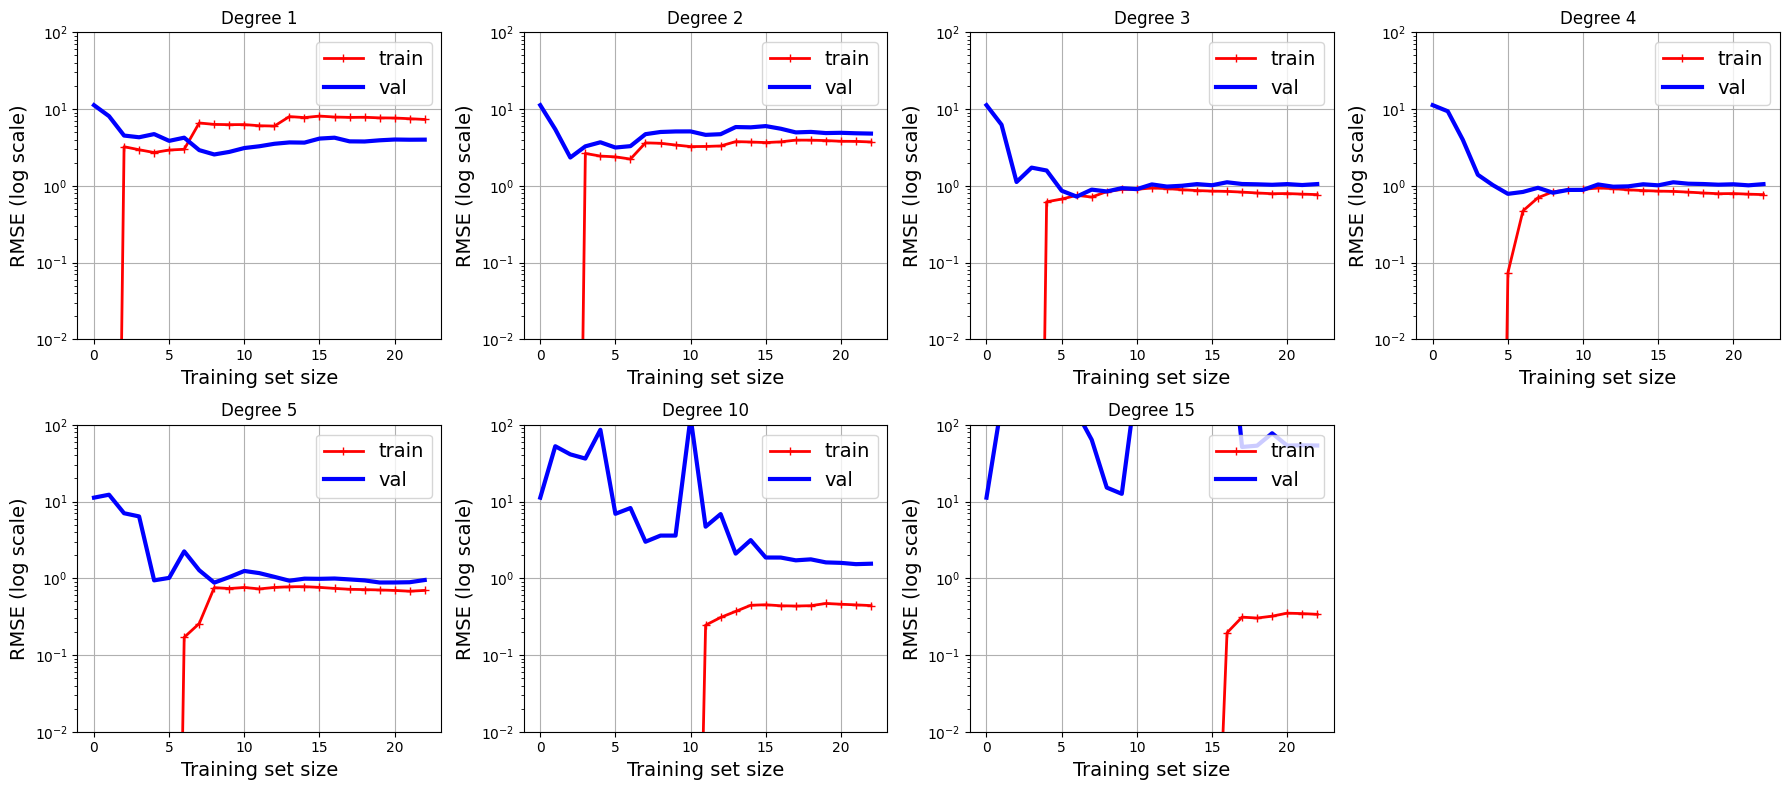

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Function to Generate Data
def generate_data(size, noise_level=0.1):
    np.random.seed(42)
    X = np.random.uniform(-3, 3, size)
    y = X - 2 * (X ** 2) + X ** 3 + np.random.normal(0, noise_level, size)
    X = X.reshape(-1, 1)
    return X, y

#Graph Function
def plot_learning_curves(model, X, y, axis):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])                    # uses the model passed into this function to fit using, in this case, linear regression
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) #MSE
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    axis.semilogy(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    axis.semilogy(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    axis.legend(loc="upper right", fontsize=14)
    axis.set_xlabel("Training set size", fontsize=14)
    axis.set_ylabel("RMSE (log scale)", fontsize=14)
    axis.set_ylim([1e-2, 1e2])

# Generate Data
X, y = generate_data(30, noise_level=1)

#Degrees of polynomial to be tested
degrees = [1, 2, 3, 4, 5, 10, 15]

#Plots
plt.figure(figsize=(18, 8))
for i, degree in enumerate(degrees, 1):
    plt.subplot(2, 4, i)
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    lin_reg = LinearRegression()                             # creates a class of linear regression model, to pass to the fucntion
    plot_learning_curves(lin_reg, X_poly, y, plt.gca())
    plt.title(f"Degree {degree}")
    plt.grid(True)

plt.tight_layout()
plt.show()



Problem 1:
a.) Degree 1 represents a case of underfitting where both training data and validation data do not come near the allowed error level of 𝜖=1

b.) To mitigate this, increase the complexity of the model. In this case, increasing the degree of the polynomial would help.

Problem 2.

a.) Degree 15 represents a case of overfitting the data.
b.) To mitigate this, reducing the complexity of the model should suffice for this model, but increasing the number of training data instances could help as well.

Probem 3:

Degree 3 is the optimal choice here as validation data error level remains below 𝜖=1 and is the least complex model.